In [172]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as ss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.utils import check_array
from sklearn.utils.validation import check_array
import pmdarima as pm

In [192]:
zillowsale = 'data/Sale_Prices.csv'
zillowlisting = 'data/Zip_MedianListingPrice.csv'

In [193]:
dfSale = pd.read_csv(zillowsale)
dfListing = pd.read_csv(zillowlisting, encoding='latin1')

In [194]:
dfListing.rename(columns={'RegionName':'ZipCode'}, inplace=True)
dfSale.rename(columns={'RegionName':'ZipCode'}, inplace=True)

In [195]:
dfSale.head()

RegionID  Type  ZipCode StateName  SizeRank   2008-03   2008-04   2008-05  \
0     61639  Sale    10025  New York         1       NaN       NaN       NaN   
1     61637  Sale    10023  New York         2       NaN       NaN       NaN   
2     91982  Sale    77494     Texas         3  231700.0  239800.0  241500.0   
3     91940  Sale    77449     Texas         4       NaN       NaN       NaN   
4     91733  Sale    77084     Texas         5  117100.0  112900.0  116000.0   

    2008-06   2008-07  ...    2019-01    2019-02    2019-03    2019-04  \
0       NaN       NaN  ...   915500.0   914700.0  1076700.0  1034000.0   
1       NaN       NaN  ...  1146700.0  1238300.0  1204300.0  1254700.0   
2  254100.0  253500.0  ...   336700.0   338300.0   330100.0   332300.0   
3       NaN       NaN  ...   184800.0   188100.0   188700.0   187900.0   
4  114500.0  116800.0  ...   179100.0   180300.0   181800.0   178200.0   

     2019-05    2019-06    2019-07    2019-08    2019-09   2019-10  
0  1213600.0  1012500.0  1053000.0   861000.0  1001200.0  910400.0  
1  1148200.0  1240800.0  1151000.0  1147300.0  1049700.0  975500.0  
2   336800.0   336800.0   332200.0   322000.0   321400.0       NaN  
3   185300.0   185600.0   188400.0   187700.0   184900.0  186000.0  
4   177300.0   179000.0   182600.0   183200.0   187200.0  191000.0  

[5 rows x 145 columns]

In [196]:
# Rotates table so dates are tuples rather than columns
dfSale = dfSale.melt(id_vars=["RegionID", "Type","ZipCode", 'StateName', 'SizeRank'], 
        var_name="Date", 
        value_name="Price")
dfSale.head()

RegionID  Type  ZipCode StateName  SizeRank     Date     Price
0     61639  Sale    10025  New York         1  2008-03       NaN
1     61637  Sale    10023  New York         2  2008-03       NaN
2     91982  Sale    77494     Texas         3  2008-03  231700.0
3     91940  Sale    77449     Texas         4  2008-03       NaN
4     91733  Sale    77084     Texas         5  2008-03  117100.0

In [197]:
dfSale.dtypes

RegionID       int64
Type          object
ZipCode        int64
StateName     object
SizeRank       int64
Date          object
Price        float64
dtype: object

In [198]:
dfSale = dfSale.groupby('Date')['Price'].mean()
dfSale.head()

Date
2008-03    268532.472325
2008-04    263376.547765
2008-05    257362.771628
2008-06    253448.240589
2008-07    250667.563162
Name: Price, dtype: float64

In [199]:
# Rotates table so dates are tuples rather than columns
dfListing = dfListing.melt(id_vars=["Type","ZipCode", "City", "State", "Metro", "CountyName", "SizeRank"], 
        var_name="Date", 
        value_name="Price")
dfListing[:5]

Type  ZipCode      City State                             Metro  \
0  Listing    10025  New York    NY       New York-Newark-Jersey City   
1  Listing    60657   Chicago    IL          Chicago-Naperville-Elgin   
2  Listing    10023  New York    NY       New York-Newark-Jersey City   
3  Listing    77494      Katy    TX  Houston-The Woodlands-Sugar Land   
4  Listing    60614   Chicago    IL          Chicago-Naperville-Elgin   

        CountyName  SizeRank     Date     Price  
0  New York County         1  2010-01  795000.0  
1      Cook County         2  2010-01  389900.0  
2  New York County         3  2010-01       NaN  
3    Harris County         4  2010-01  287478.0  
4      Cook County         5  2010-01  482400.0

In [157]:
#dfCombined = pd.merge(dfListing, dfSale, on=['Type'], how='left')
#dfCombined.head()

In [201]:
dfListing = dfListing.groupby('Date')['Price'].mean()
dfListing.head()

Date
2010-01    258720.988410
2010-02    257238.994133
2010-03    255656.032014
2010-04    254281.634553
2010-05    254056.743429
Name: Price, dtype: float64

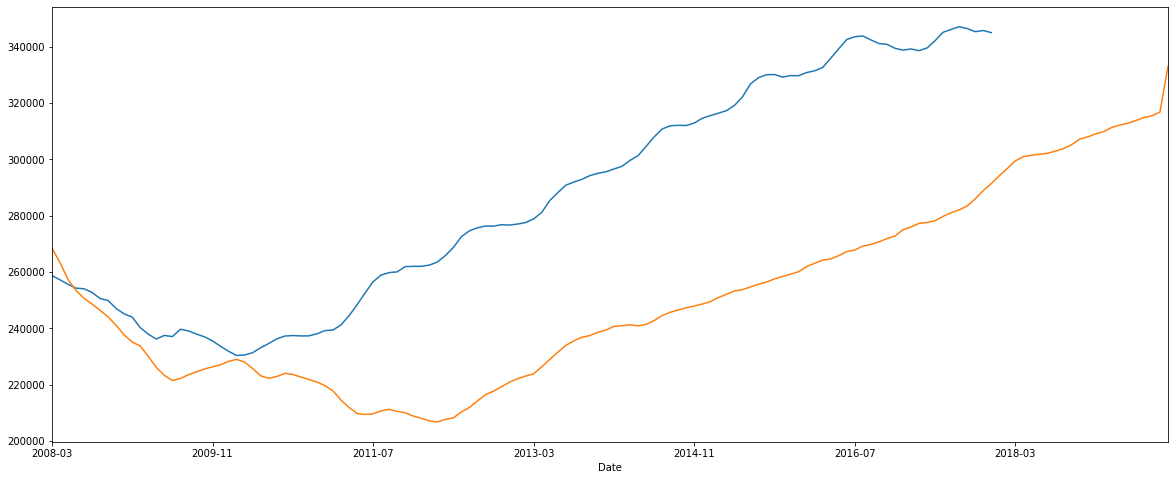

In [204]:
dfListing.plot(figsize=(20,8))
dfSale.plot()